# Distinguishing b/w dogs and cats using cnn

In [1]:
from tensorflow import keras
import os

In [2]:
pip install wget

In [3]:
!wget  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


For some unknown reason wget doesn't seem to work right now on my lappy. So, I am gonna download manually right now.

In [4]:
import zipfile
local_zip = 'cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('') # can give the destination here inside extractall
zip_ref.close()

In [5]:
os.listdir('cats_and_dogs_filtered')
os.listdir('cats_and_dogs_filtered/train')

['cats', 'dogs']

In [6]:
base_dir = 'cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'validation')

train_dog_dir = os.path.join(train_dir,'dogs')
train_cat_dir = os.path.join(train_dir,'cats')

val_dog_dir = os.path.join(val_dir,'dogs')
val_cat_dir = os.path.join(val_dir,'cats')

Let's see the names of dogs and cat file

In [7]:
os.listdir(train_dog_dir)[:10]
#os.listdir(train_cat_dir)[:10]

['dog.0.jpg',
 'dog.1.jpg',
 'dog.10.jpg',
 'dog.100.jpg',
 'dog.101.jpg',
 'dog.102.jpg',
 'dog.103.jpg',
 'dog.104.jpg',
 'dog.105.jpg',
 'dog.106.jpg']

In [8]:
train_cat_fnames = os.listdir( train_cat_dir )
train_dog_fnames = os.listdir( train_dog_dir )

Let's find out the total number of cat and dog images in the train and validation directories:

In [9]:
print(len(os.listdir(train_dog_dir)))
print(len(os.listdir(train_cat_dir)))

1000
1000


In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows=50
ncols=50

pic_index=0 # index for iterating over images

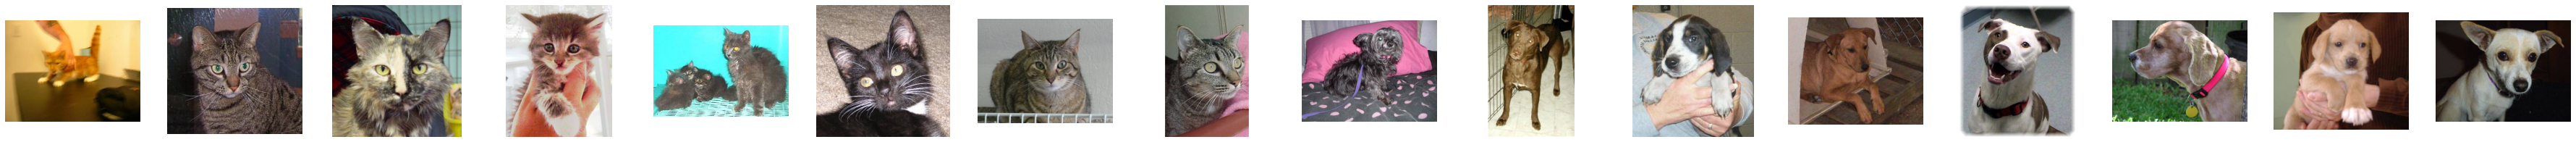

In [11]:
fig=plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8

next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [12]:
import tensorflow as tf

In [13]:
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [15]:
from tensorflow.keras.optimizers import RMSprop
# We have to give learning_rate in case of RMSprop. Other optimizer such as adam will also work okay here
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Let's set up data generators that will read pictures in our source folders, convert them to float32 tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory). These generators can then be used with the Keras model methods that accept data generators as inputs: fit, evaluate_generator, and predict_generator.

In [17]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   target_size=(150,150))

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                       batch_size=20,
                                                       class_mode='binary',
                                                       target_size=(150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
history = model.fit(train_generator,
                   validation_data = validation_generator,
                   steps_per_epoch=100,
                   epochs=15,
                   validation_steps=50,
                   verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/15
100/100 [==============================] - 50s 502ms/step - loss: 0.7428 - accuracy: 0.5810 - val_loss: 0.6337 - val_accuracy: 0.6440
Epoch 2/15
100/100 [==============================] - 47s 471ms/step - loss: 0.6043 - accuracy: 0.6790 - val_loss: 0.5735 - val_accuracy: 0.7160
Epoch 3/15
100/100 [==============================] - 47s 474ms/step - loss: 0.5202 - accuracy: 0.7450 - val_loss: 0.5564 - val_accuracy: 0.7130
Epoch 4/15
100/100 [==============================] - 46s 460ms/step - loss: 0.4441 - accuracy: 0.8010 - val_loss: 0.7766 - val_accuracy: 0.6690
Epoch 5/15
100/100 [==============================] - 47s 472ms/step - loss: 0.3598 - accuracy: 0.8465 - val_loss: 0.6177 - val_accuracy: 0.6950
Epoch 6/15
100/100 [==============================] - 48s 475ms/step - loss: 0.2615 - accuracy: 0.8940 - val_loss: 0.6790 - val_accuracy: 0.7120
Epoch 7/15
100/100 [=================

# Taking some cue from moroney course. Printing the intermediate convolutions effect and plotting val and training acc and loss

In [ ]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and validation loss')

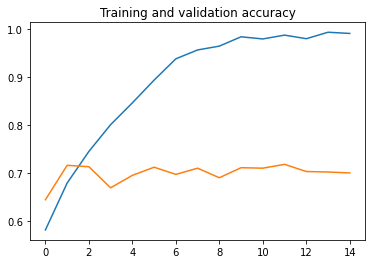

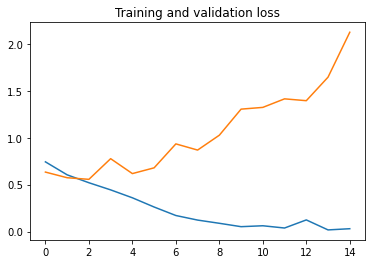

In [19]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )